In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, Nf = 10001, 3
t = np.arange(N, dtype=float)
Ts = np.random.random(Nf)*2000+10
fs = 1./Ts
amp = np.random.random(Nf)*200 + 100
phi = np.random.random(Nf)*2*np.pi
h = np.zeros(N)
for j in range(len(fs)):
    h += amp[j]*np.sin(2*np.pi*t*fs[j]+phi[j])
hn = h + np.random.randn(N)*3*h + np.random.randn(N)*700

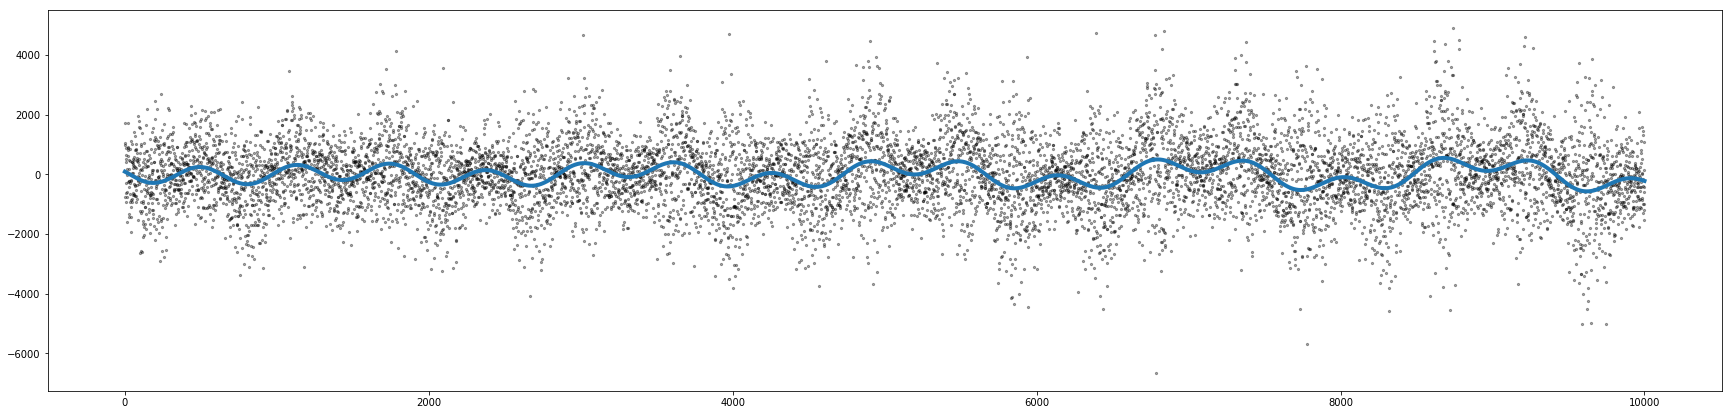

In [3]:
fig = plt.figure(figsize=(30,7))
ax = fig.add_subplot(111)
ax.plot(h,lw = 4)
ax.scatter(t,hn,color='black', s = 5, alpha = 0.35)
plt.show()

In [4]:
Hn = np.fft.fft(hn)
freq = np.fft.fftfreq(N)
ind_freq =np.arange(1, N//2 +1)

In [5]:
freq

array([ 0.00000000e+00,  9.99900010e-05,  1.99980002e-04, ...,
       -2.99970003e-04, -1.99980002e-04, -9.99900010e-05])

In [7]:
freq[-ind_freq]

array([-9.99900010e-05, -1.99980002e-04, -2.99970003e-04, ...,
       -4.99750025e-01, -4.99850015e-01, -4.99950005e-01])

In [8]:
psd = np.abs(Hn[ind_freq])**2 + np.abs(Hn[-ind_freq])**2

In [30]:
ind = np.where(psd >0.5e12)
mainf=freq[ind_freq[ind]]
len(mainf)

3

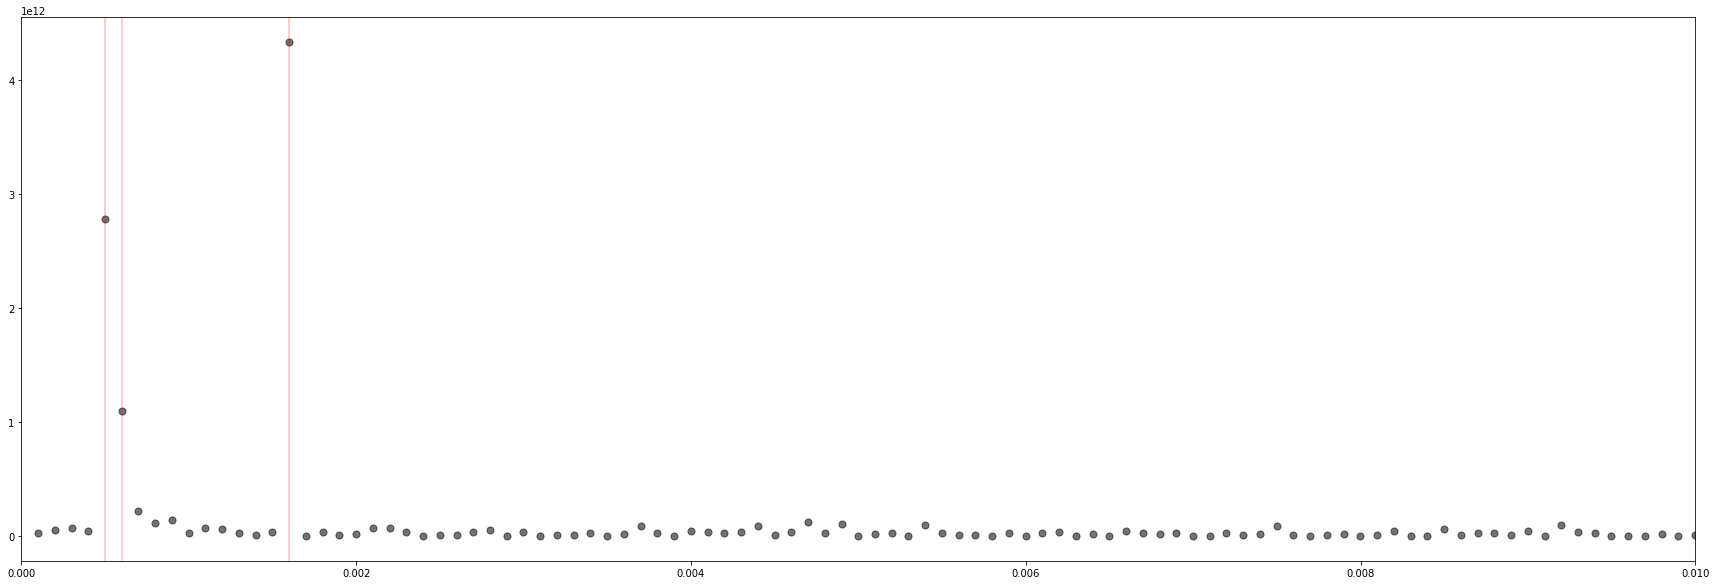

In [31]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
for i in range(len(mainf)):
    ax.axvline(mainf[i],color='red',alpha = 0.25 )
ax.set_xlim([0, 0.01])
ax.scatter(freq[ind_freq],psd,color='black', s = 50.25, alpha = 0.55)
plt.show()

In [32]:
Hn_cut = np.zeros_like(Hn)

In [33]:
Hn_cut

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [34]:
Hn_cut[ind_freq[ind]]= Hn[ind_freq[ind]]
Hn_cut[-ind_freq[ind]]= Hn[-ind_freq[ind]]

In [35]:
hn_cut = np.fft.ifft(Hn_cut)

/home/jaime/miniconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


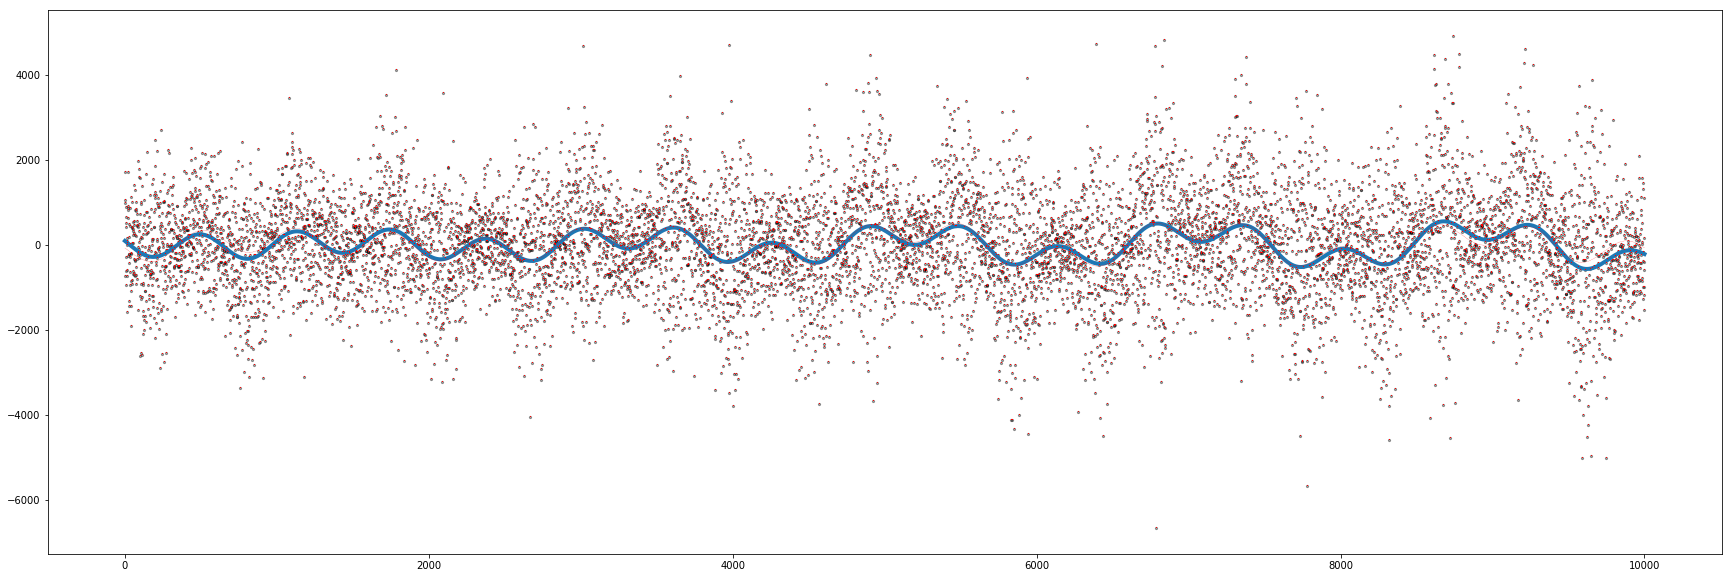

In [36]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(h,lw = 4)
ax.plot(t,np.fft.ifft(Hn),'r,' )
ax.scatter(t,hn,color='black', s = 5, alpha = 0.35)
ax.plot(t,hn_cut, 'r--', lw = 0.25)
plt.show()

In [37]:
np.abs(freq[ind_freq[ind]]-fs)

array([1.09534153e-03, 4.43544963e-05, 1.08478880e-03])

In [38]:
fs


array([0.00159529, 0.00055559, 0.00051505])